# Plotting Peta Kasus COVID19 di Indonesia

Sumber Data: https://bnpb-inacovid19.hub.arcgis.com/datasets/data-harian-kasus-per-provinsi-covid-19-indonesia/geoservice

Struktur Data:
1. attributes
 * FID: ID Unik
 * Kode_Provi: Kode Provinsi
 * Provinsi: Nama Provinsi
 * Kasus_Posi: Jumlah Kasus Positiv Covid19
 * Kasus_Semb: Jumlah Kasus Sembuh Covid19
 * Kasus_Meni: Jumlah Kasus Meninggal Covid19
2. geometry
 * x: Latitude
 * y: Longitude

# Import Library

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

response = requests.get('https://services5.arcgis.com/VS6HdKS0VfIhv8Ct/arcgis/rest/services/COVID19_Indonesia_per_Provinsi/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
todos = json.loads(response.text)

In [2]:
# print(todos)

In [3]:
def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, indent=4)
    print(text)

jprint(response.json())

{
    "objectIdFieldName": "FID",
    "uniqueIdField": {
        "name": "FID",
        "isSystemMaintained": true
    },
    "globalIdFieldName": "",
    "geometryType": "esriGeometryPoint",
    "spatialReference": {
        "wkid": 4326,
        "latestWkid": 4326
    },
    "fields": [
        {
            "name": "FID",
            "type": "esriFieldTypeOID",
            "alias": "FID",
            "sqlType": "sqlTypeOther",
            "domain": null,
            "defaultValue": null
        },
        {
            "name": "Kode_Provi",
            "type": "esriFieldTypeInteger",
            "alias": "Kode_Provi",
            "sqlType": "sqlTypeOther",
            "domain": null,
            "defaultValue": null
        },
        {
            "name": "Provinsi",
            "type": "esriFieldTypeString",
            "alias": "Provinsi",
            "sqlType": "sqlTypeOther",
            "length": 254,
            "domain": null,
            "defaultValue": null
        },
    

In [4]:
features = response.json()['features']
data = []
for i in features:
    row = []
    row.append(i['attributes']['FID'])
    row.append(i['attributes']['Kode_Provi'])
    row.append(i['attributes']['Provinsi'])
    row.append(i['attributes']['Kasus_Posi'])
    row.append(i['attributes']['Kasus_Semb'])
    row.append(i['attributes']['Kasus_Meni'])
    row.append(i['geometry']['x'])
    row.append(i['geometry']['y'])
    data.append(row)
hasil = pd.DataFrame(data, columns=['fid', 'kode_prov', 'nama_prov', 'positif', 'sembuh', 'meninggal', 'lat', 'long'])
    
hasil

,fid,kode_prov,nama_prov,positif,sembuh,meninggal,lat,long
0,1,11,Aceh,9616,7898,387,96.909523,4.225082
1,2,12,Sumatera Utara,25423,22062,859,99.057888,2.184779
2,3,13,Sumatera Barat,29714,28046,655,100.466805,-0.851914
3,4,14,Riau,32103,30337,783,101.812892,0.510526
4,5,15,Jambi,5637,4526,86,103.599320,-1.617750
5,6,16,Sumatera Selatan,16358,14588,788,104.170419,-3.213347
6,7,17,Bengkulu,5067,4683,150,102.263120,-3.791160
7,8,19,Bangka Belitung,7717,7094,117,105.986948,-2.252956
8,9,18,Lampung,12960,11463,672,105.018313,-4.918073
9,10,21,Kepulauan Riau,8804,8414,221,108.202229,3.915947


In [5]:
hasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fid        35 non-null     int64  
 1   kode_prov  35 non-null     int64  
 2   nama_prov  35 non-null     object 
 3   positif    35 non-null     int64  
 4   sembuh     35 non-null     int64  
 5   meninggal  35 non-null     int64  
 6   lat        35 non-null     float64
 7   long       35 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ KB


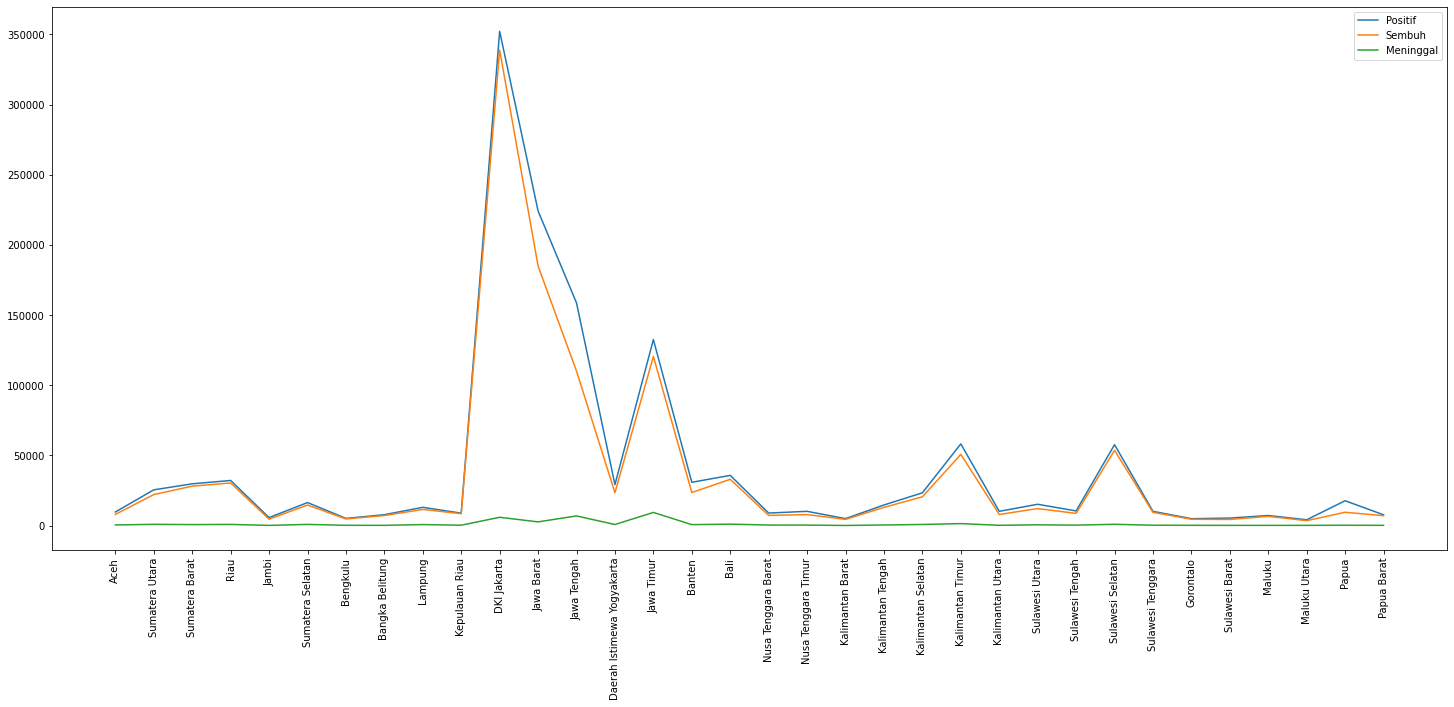

In [6]:
plt.figure(figsize=(25, 10))
plt.plot(hasil['nama_prov'][:34], hasil['positif'][:34], label='Positif')
plt.plot(hasil['nama_prov'][:34], hasil['sembuh'][:34], label='Sembuh')
plt.plot(hasil['nama_prov'][:34], hasil['meninggal'][:34], label='Meninggal')
plt.xticks(rotation=90)
plt.legend()
plt.show()

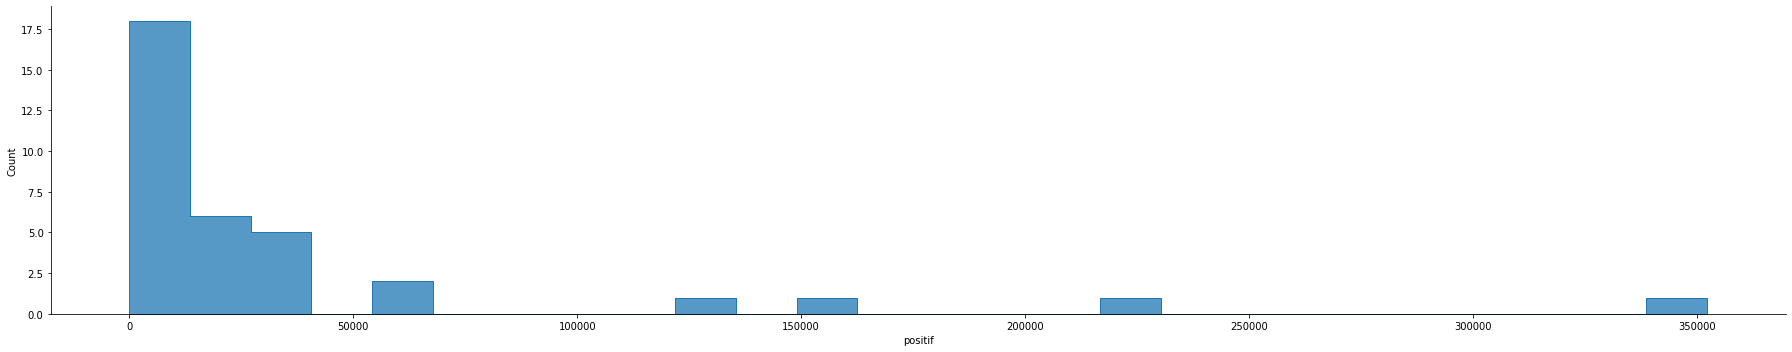

In [7]:
sns.displot(hasil, x='positif', element='step', height=5, aspect=5)
plt.show()

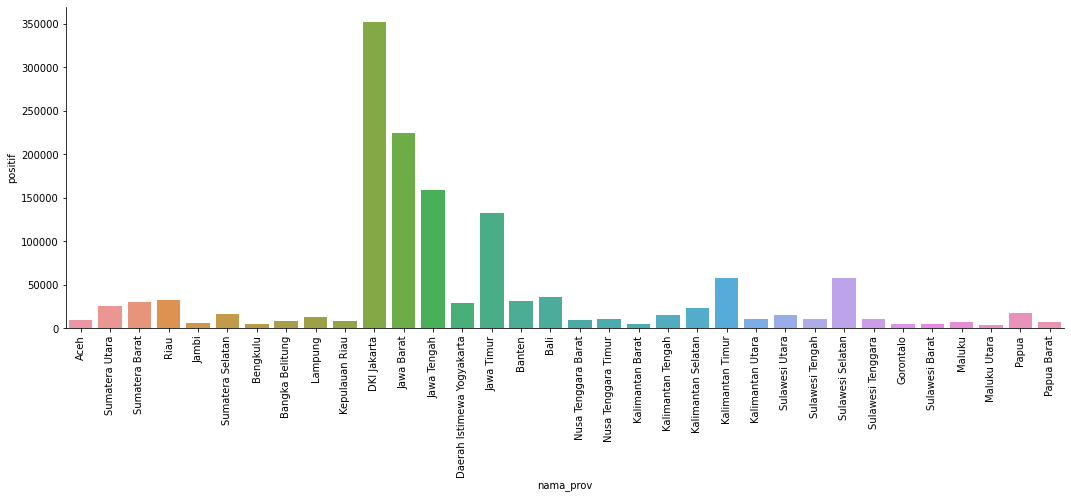

In [8]:
sns.catplot(x='nama_prov', y='positif', kind='bar', data=hasil[:34], height=5, aspect=3)
plt.xticks(rotation=90)
plt.show()

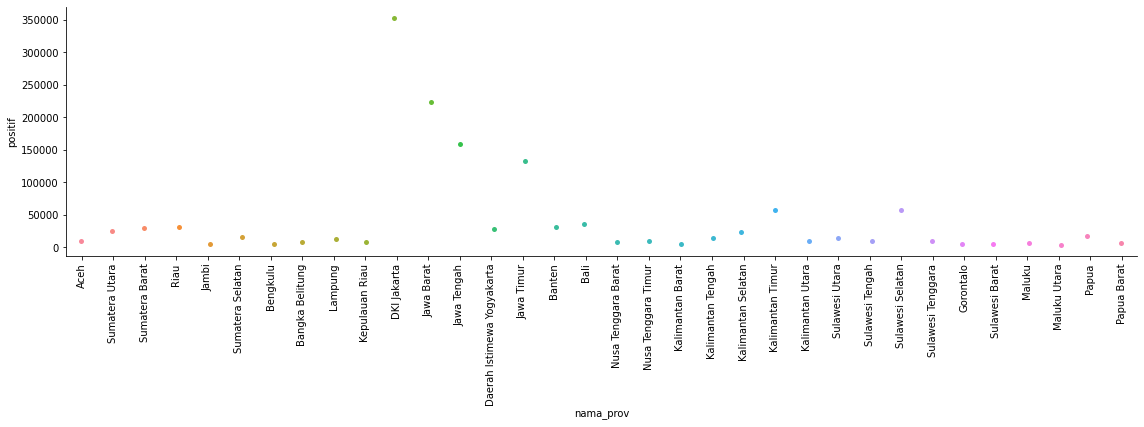

In [9]:
sns.catplot(x='nama_prov', y='positif', data=hasil[:34], height=4, aspect=4)
plt.xticks(rotation=90)
plt.show()

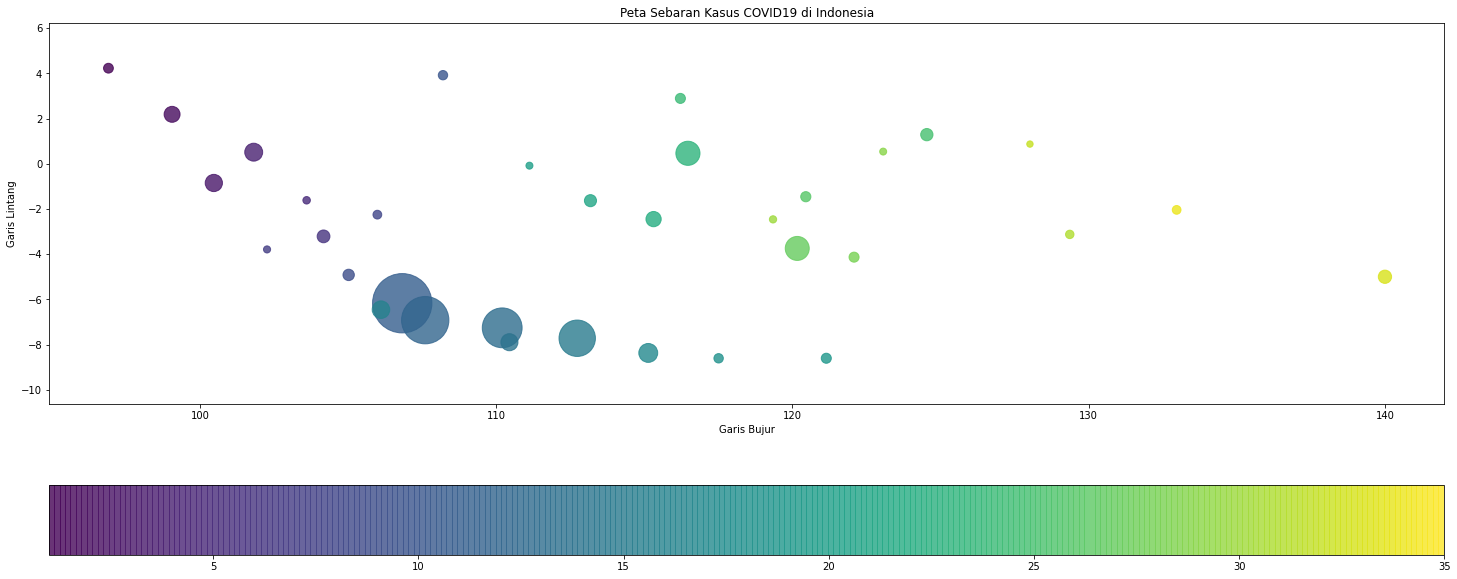

In [10]:
x = hasil['lat']
y = hasil['long']
size = hasil['positif'] / 100
color = hasil['fid']

fig, ax = plt.subplots(figsize=(25,10))
sc = plt.scatter(x, y, s=size, c=color, alpha=.8)
plt.colorbar(sc, orientation="horizontal")
plt.title('Peta Sebaran Kasus COVID19 di Indonesia')
plt.xlabel('Garis Bujur')
plt.ylabel('Garis Lintang')
plt.xlim([96.90952274776174-2, 140.0000000003746+2])
plt.ylim([-8.606652084111358-2, 4.225081892093782+2])
plt.show()

In [11]:
pip install geopandas

     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 14.8MB 310kB/s 
     |████████████████████████████████| 6.5MB 39.6MB/s 


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
BBox = ((hasil['lat'].min(), hasil['lat'].max(), hasil['long'].min(),   hasil['long'].max()))
BBox

(96.90952274776174, 140.0000000003746, -8.606652084111358, 4.225081892093782)

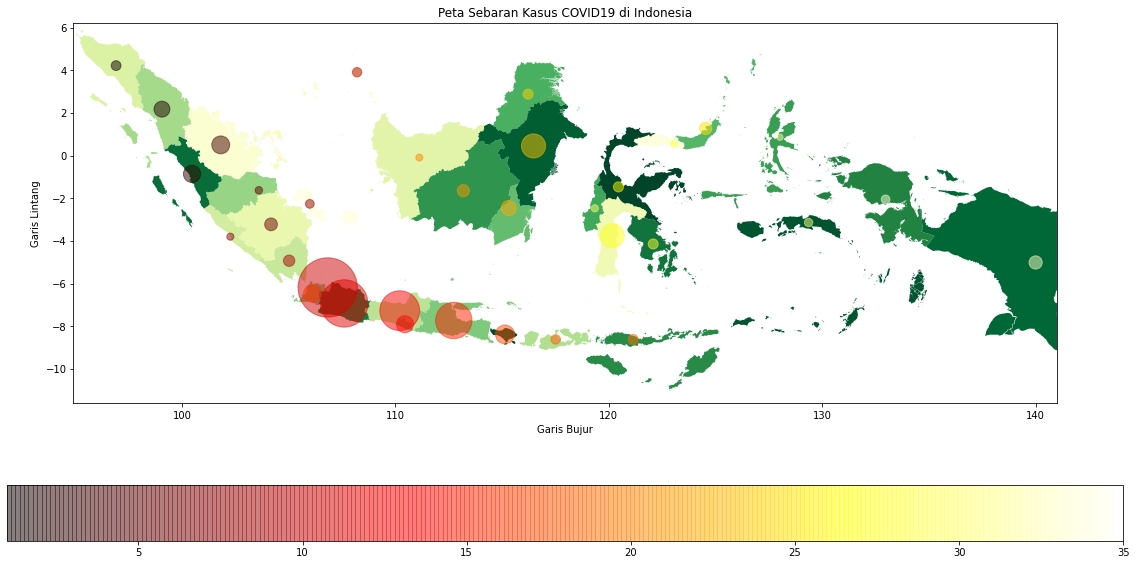

In [14]:
import geopandas as gpd

map_df = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Indonesia.shx")


kordinat = hasil[['lat', 'long']]
merged = map_df.join(kordinat)

x = hasil['lat']
y = hasil['long']
size = hasil['positif'] / 100
color = hasil['fid']

# fig, ax = plt.subplots(figsize=(25,10))
ax = map_df.plot(figsize=(20,10), cmap='YlGn')
sc = plt.scatter(x, y, s=size, c=color, alpha=.5, cmap='hot')
plt.colorbar(sc, orientation="horizontal")
plt.title('Peta Sebaran Kasus COVID19 di Indonesia')
plt.xlabel('Garis Bujur')
plt.ylabel('Garis Lintang')
plt.xlim([96.90952274776174-2, 140.0000000003746+1])
plt.ylim([-8.606652084111358-3, 4.225081892093782+2])
plt.show()